# Carrington

In [6]:
import os
from module import carrington, readFitsBz2
import matplotlib.pyplot as plt

In [7]:
folder = 'carrington_test_data/'

carrington_list = []
for filename in os.listdir(folder):
    carrington_list.append(carrington(folder + filename))
    


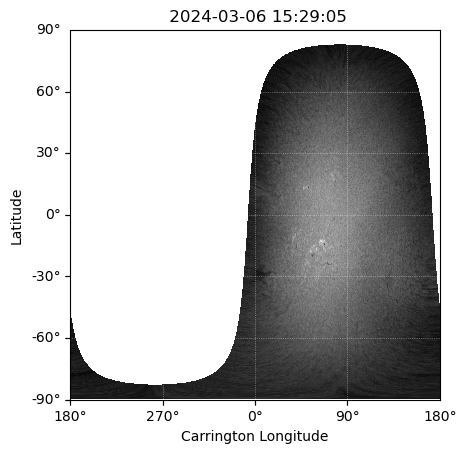

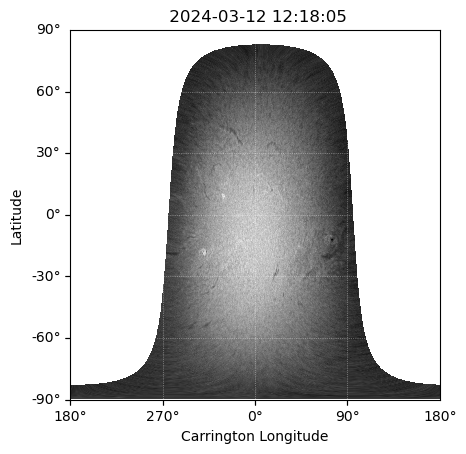

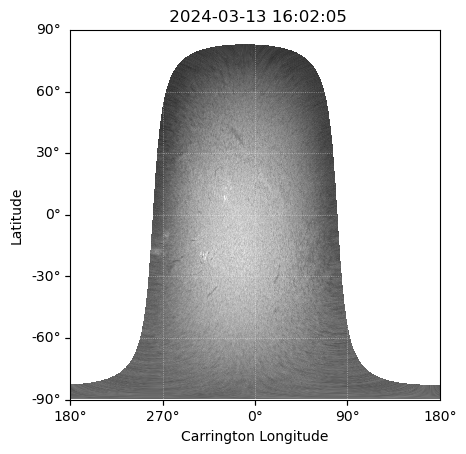

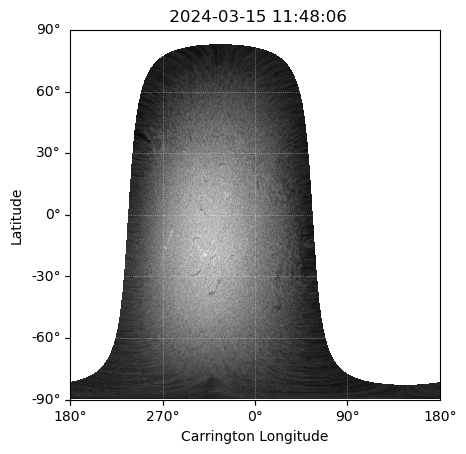

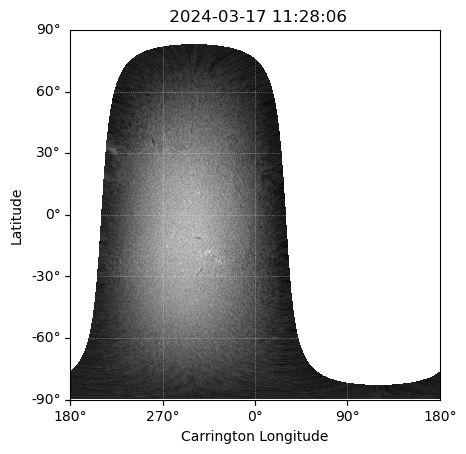

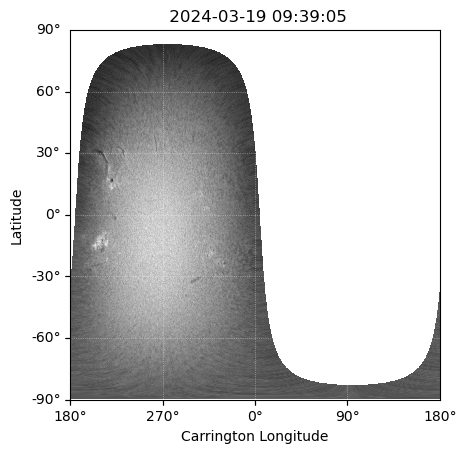

In [8]:
for carr in carrington_list:
    fig = plt.figure()
    ax = fig.add_subplot(projection=carr)
    carr.plot(axes=ax)
    #carr.draw_limb(color='blue')